## Import Library

In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import matplotlib
df = pd.read_csv('Cars.csv')


## Load Data

In [2]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
#Check amount of data
df.shape

(8128, 13)

In [4]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Feature Mapping

In [7]:
#Data Mapping, First Owner = 1, ... , Test Drive Car = 5
df["owner"].unique()

mapping = {"First Owner" : 1, "Second Owner" : 2, "Third Owner" : 3, "Fourth & Above Owner" : 4, "Test Drive Car" : 5}

df["owner"] = df["owner"].map(mapping)

df["owner"].unique()

array([1, 2, 3, 4, 5])

In [8]:
df = df[~df["fuel"].isin(["CNG", "LPG"])]

In [9]:
df["mileage"] = df["mileage"].str.split().str[0]

df["mileage"] = df["mileage"].astype(float)

In [10]:
df["engine"] = df["engine"].str.split().str[0]

df["engine"] = df["engine"].astype(float)

In [11]:
df["max_power"] = df["max_power"].str.split().str[0]

df["max_power"] = df["max_power"].astype(float)

In [12]:
df["name"] = df["name"].str.split(" ").str[0]

In [13]:
df = df.drop(columns=['torque'])

In [14]:
df = df[df['owner'] != 5]

In [15]:
y = np.log(df['selling_price'])

In [16]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [17]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [18]:
#renaming column 'name' to 'brand'
df.rename(columns= {
    'name': 'brand'}, inplace= True)

df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

## Univariate Analysis

<Axes: xlabel='owner', ylabel='count'>

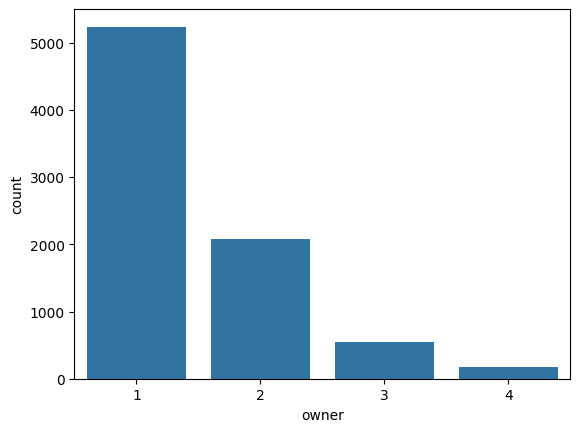

In [19]:
#How many different owners are there?
sns.countplot(data = df, x = 'owner')

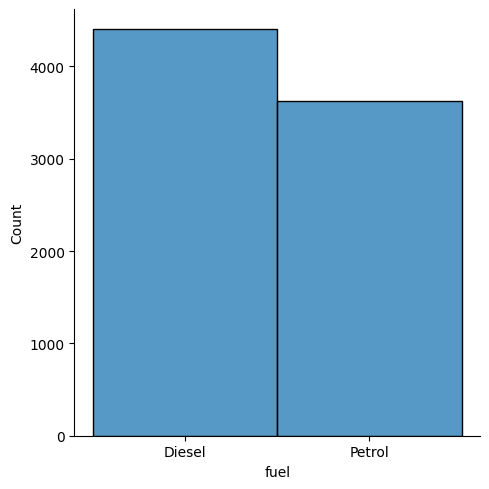

In [20]:
sns.displot(data = df, x = 'fuel')

Text(0.5, 0, 'Fuel')

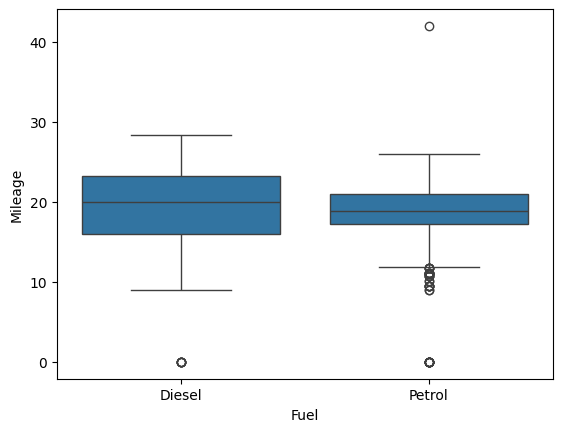

In [21]:
#Multivariate Analysis
sns.boxplot(x = df["fuel"], y = df["mileage"]);
plt.ylabel("Mileage")
plt.xlabel("Fuel")

<Axes: xlabel='mileage', ylabel='selling_price'>

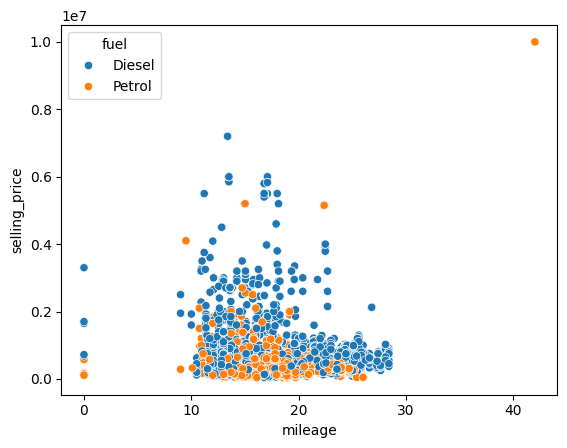

In [22]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['fuel'])

In [23]:
from sklearn.preprocessing import LabelEncoder
#do label encoding for fuel
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])

#do label encoding for transmission
le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])

## Heat Map

<Axes: >

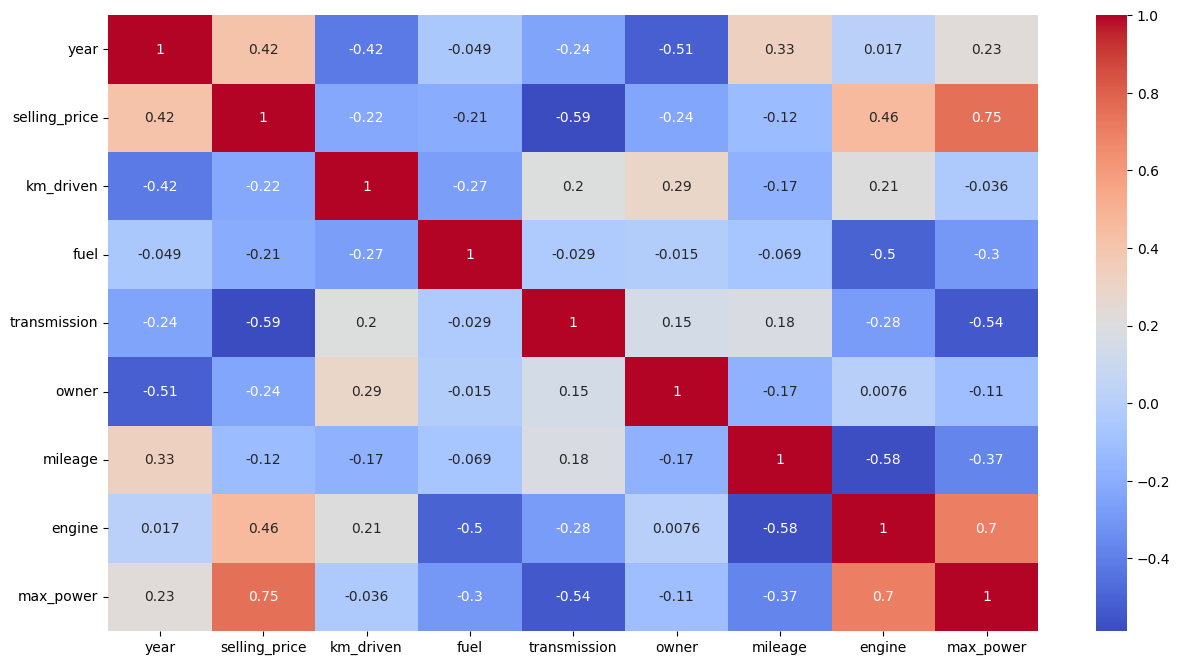

In [24]:
#drop brand columns
df = df.drop(columns=['brand'])

# Drop the original 'seller_type' column if it's no longer needed
df = df.drop(columns=['seller_type'])

# Drop the original 'seats' column if it's no longer needed
df = df.drop(columns=['seats'])

# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Null Values

In [25]:
#Check for Null Values
df.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
dtype: int64

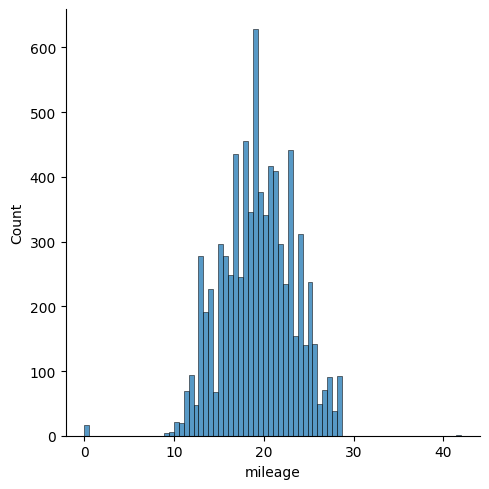

In [26]:
sns.displot(df.mileage)

In [27]:
#Fill out mileage with mean

df['mileage'].fillna(df['mileage'].mean(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26464\2088284964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].mean(), inplace=True)


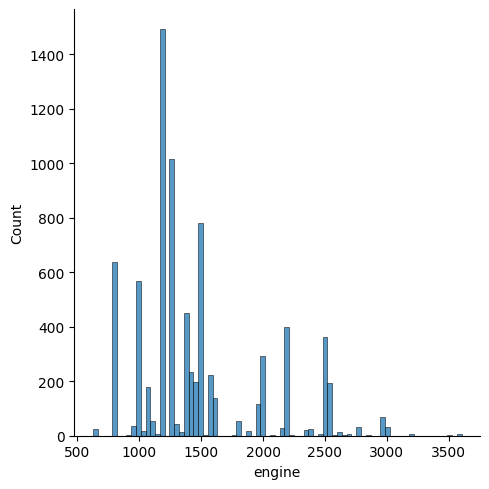

In [28]:
sns.displot(df.engine)

In [29]:
#Fill out engine with median

df['engine'].fillna(df['engine'].median(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26464\2990182329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df['engine'].median(), inplace=True)


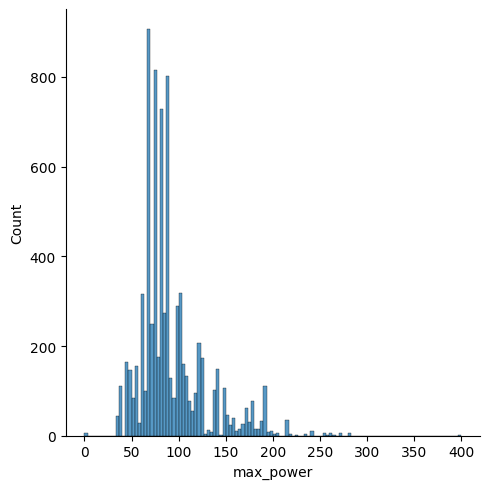

In [30]:
sns.displot(df.max_power)

In [31]:
#Fill out max_power with median

df['max_power'].fillna(df['max_power'].median(), inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26464\1770132938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].median(), inplace=True)


In [32]:
#check the missing value in df data set
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
dtype: int64

## Modeling

In [33]:
import mlflow
import mlflow.sklearn

import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
#mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "takdanai"
#mlflow.create_experiment(name="takdanai-regularization-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="takdanai-regularization-example")

<Experiment: artifact_location='file:///d:/A2_Car_Price/mlruns/528916820797049174', creation_time=1757423799310, experiment_id='528916820797049174', last_update_time=1757423799310, lifecycle_stage='active', name='takdanai-regularization-example', tags={}>

In [34]:
#x is our strong features
X = df[["year", "mileage", "km_driven", "owner"]]

#y is simply the life expectancy col
y = np.log(df['selling_price'])

Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

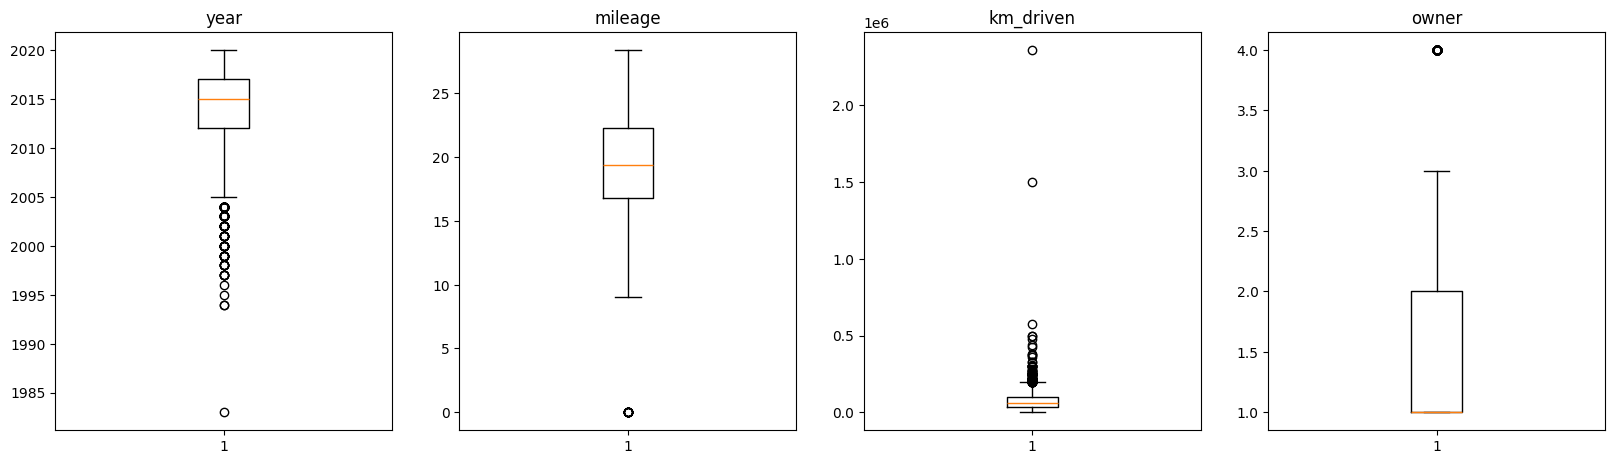

In [36]:
#Check Outliers:

# Create a dictionary of columns.
col_dict = {'year':1,'mileage':2, "km_driven":3, "owner":4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [37]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [38]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%

---------------owner---------------

Number of outliers: 110
Percent of data that is outlier: 1.96%


## Scaling

In [ ]:
#Scaling
#from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

#x = (x - mean) / std
#allows your machine learning model to catch the pattern/relationship faster
#faster convergence

#how many ways to scale
#standardardization <====current way
# (x - mean) / std
#--> when your data follows normal distribution

#normalization <---another way
# (x - x_min) / (x_max - x_min)
#---> when your data DOES NOT follow normal distribution (e.g., audio, signal, image)

In [40]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [41]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2) 
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.inf

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            self.theta = np.zeros(X_cross_train.shape[1])
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - self.lr * grad
        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:] 
                               
    def _bias(self):
        return self.theta[0]

In [42]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method)

In [43]:
# pseudocode for xavier weight initialization

m = 10  #number of sample 

lower , upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m)) # calculate the range for the weights

print (lower , upper ) # summarize the range

numbers = np.random.rand(1000) # generate random numbers, randomly pick weights within this range
scaled = lower + numbers * ( upper - lower )
print ( scaled )

-0.31622776601683794 0.31622776601683794
[ 1.47099127e-02  1.12212688e-01 -2.54091378e-01  7.20015688e-02
 -9.78752472e-02 -1.45310636e-01  2.38161802e-01  1.64023743e-01
 -1.59528455e-01 -2.62618772e-01 -2.21615269e-01  7.75125157e-02
  1.57765495e-01 -1.88287342e-02 -2.99338873e-01  1.55731130e-01
  1.05739383e-01  2.78117668e-01  1.35689117e-01 -1.00401088e-01
 -7.56665050e-02  3.03106704e-01 -2.19867862e-01 -2.68722316e-01
  1.66413819e-01  1.83974218e-01 -2.72666976e-01 -1.39196761e-01
 -2.90733199e-01 -2.66242694e-01  2.31091762e-02  1.62833222e-01
  9.98148030e-02 -1.04426847e-01 -1.95773494e-01 -1.06224933e-01
  1.05912826e-01 -3.97388816e-02 -3.00645743e-01  8.73835030e-02
 -1.25460202e-02  2.42624471e-02 -2.27956793e-02  1.41845124e-01
  3.08270034e-01  2.55654428e-02 -1.60630116e-01 -1.50794568e-01
  2.18214286e-01  3.15161201e-01  2.56777250e-02  2.92474455e-01
  9.55007479e-02  7.66930350e-02  2.60224065e-01  1.77647735e-01
  1.09428710e-01  6.92735401e-02  2.50133165e-01 

In [44]:
# pseudocode for momentum
alpha = 0.01       # Learning rate
grad = 0.1         # Example gradient value
momentum = 0.9     # Momentum coefficient
theta = 1.0        # Initial parameter value
prev_step = 0.0    # Initial previous step

def update():
    step = alpha * grad
    theta = theta - step + momentum * prev_step
    prev_step = step

## Experiment

In [45]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [46]:
import mlflow
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure y_train is a NumPy array to avoid indexing issues
y_train = np.array(y_train)

# Mapping for model names to classes
def str_to_class(classname):
    model_classes = {
        "Ridge": Ridge,
        "Lasso": Lasso,
        "ElasticNet": ElasticNet
    }
    return model_classes.get(classname, None)

# Regularization models to run
regs = ["Ridge", "Lasso", "ElasticNet"]

for reg in regs:
    # Correct parameters for Ridge, Lasso, ElasticNet
    params = {"alpha": 0.1}  # Regularization strength

    # Start MLflow run
    mlflow.start_run(run_name=f"alpha-{params['alpha']}-reg-{reg}", nested=True)
    print("=" * 5, reg, "=" * 5)

    # Initialize and train the model
    type_of_regression = str_to_class(reg)
    if type_of_regression is None:
        print(f"Unknown regression type: {reg}")
        continue

    model = type_of_regression(**params)
    model.fit(X_train, y_train)

    # Predictions
    yhat = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, yhat)
    r2_value = r2_score(y_test, yhat)

    # Log metrics
    print("Test MSE:", mse)
    mlflow.log_metric(key="test_mse", value=mse)

    print("Test R²:", r2_value)
    mlflow.log_metric(key="test_r2", value=r2_value)  # Corrected the key here

    # Log the model
    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    # End MLflow run
    mlflow.end_run()

2025/09/09 20:57:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


===== Ridge =====
Test MSE: 0.2926055793946794
Test R²: 0.5841230055875377


2025/09/09 20:57:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


===== Lasso =====
Test MSE: 0.3199573840235364
Test R²: 0.5452481955981395


2025/09/09 20:57:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


===== ElasticNet =====
Test MSE: 0.30455658003822955
Test R²: 0.5671371837924


Cross Validation for Linear Regression, Ridge, Lasso, Polynomial Regression

In [47]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# MLflow Experiment
mlflow.set_experiment("Model_Comparison")

for name, model in models.items():
    with mlflow.start_run(run_name=name, nested=True):
        mse_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
        mse = -np.mean(mse_scores)

        r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=5)
        r2 = np.mean(r2_scores)

        mlflow.log_metric("Cross-Validation MSE", mse)
        mlflow.log_metric("Cross-Validation R²", r2)

        # ✅ Print Results
        print(f"📊 {name}:")
        print(f"  - Cross-Validation MSE: {mse:.4f}")
        print(f"  - Cross-Validation R²:  {r2:.4f}\n")

        mlflow.end_run()

📊 Linear Regression:
  - Cross-Validation MSE: 0.2947
  - Cross-Validation R²:  0.5799

📊 Ridge:
  - Cross-Validation MSE: 0.2947
  - Cross-Validation R²:  0.5799

📊 Lasso:
  - Cross-Validation MSE: 0.3259
  - Cross-Validation R²:  0.5354

📊 Polynomial Regression:
  - Cross-Validation MSE: 0.2841
  - Cross-Validation R²:  0.5951



Implementing with/without momentum

In [48]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
import mlflow
import numpy as np

# Define configurations for "without momentum" and "with momentum-like effect"
momentum_configs = {
    "No Momentum": SGDRegressor(alpha=0.1, max_iter=1000, learning_rate='constant', eta0=0.01, average=False),
    "With Momentum (Averaging)": SGDRegressor(alpha=0.1, max_iter=1000, learning_rate='constant', eta0=0.01, average=True)
}

# MLflow Experiment
mlflow.set_experiment("Momentum_Comparison")

for name, model in momentum_configs.items():
    with mlflow.start_run(run_name=f"SGD_{name.replace(' ', '_')}",nested=True):
        mse_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
        mse = -np.mean(mse_scores)

        r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=5)
        r2 = np.mean(r2_scores)

        # Log parameters and metrics to MLflow
        mlflow.log_param("Momentum", name)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R²", r2)

        # ✅ Print Results
        print(f"📊 {name}:")
        print(f"  - MSE: {mse:.4f}")
        print(f"  - R²:  {r2:.4f}\n")

        mlflow.end_run()

📊 No Momentum:
  - MSE: 0.3018
  - R²:  0.5603

📊 With Momentum (Averaging):
  - MSE: 0.3016
  - R²:  0.5691



Implementing Stochastic, Mini-Batch, and Batch Gradient Descent

In [49]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

# Set Cross-Validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom Training Function for Gradient Descent Variants
def custom_train(X_train, y_train, batch_size):
    model = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.01, warm_start=True)
    for epoch in range(50):
        X_shuffled, y_shuffled = shuffle(X_train, y_train)
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            model.partial_fit(X_batch, y_batch)
    return model

# Gradient Descent Methods with Corresponding Batch Sizes
methods = {
    "Stochastic": 1,                      # Stochastic Gradient Descent (1 sample per update)
    "Mini-Batch": 64,                     # Mini-Batch Gradient Descent (64 samples per update)
    "Batch": X_train.shape[0]             # Batch Gradient Descent (full dataset per update)
}

# MLflow Experiment Setup
mlflow.set_experiment("GD_Cross_Validation_Comparison")

# Run Cross-Validation for Each Method
for method_name, batch_size in methods.items():
    with mlflow.start_run(run_name=method_name,nested=True):
        mse_scores = []
        r2_scores = []

        # 5-Fold Cross-Validation Loop
        for train_index, val_index in cv.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
            y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

            # Train the Model with the Current Batch Size
            model = custom_train(X_train_cv, y_train_cv, batch_size)

            # Predict and Evaluate on Validation Set
            y_pred = model.predict(X_val_cv)
            mse = mean_squared_error(y_val_cv, y_pred)
            r2 = r2_score(y_val_cv, y_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)

        # Average MSE and R² Across 5 Folds
        avg_mse = np.mean(mse_scores)
        avg_r2 = np.mean(r2_scores)

        # Log Metrics to MLflow
        mlflow.log_param("Method", method_name)
        mlflow.log_param("Batch Size", batch_size)
        mlflow.log_metric("Cross-Validation MSE", avg_mse)
        mlflow.log_metric("Cross-Validation R²", avg_r2)

        # Print Results
        print(f"📊 {method_name} (5-Fold Cross-Validation):")
        print(f"  - Average MSE: {avg_mse:.4f}")
        print(f"  - Average R²:  {avg_r2:.4f}\n")

        mlflow.end_run()

📊 Stochastic (5-Fold Cross-Validation):
  - Average MSE: 0.2997
  - Average R²:  0.5722

📊 Mini-Batch (5-Fold Cross-Validation):
  - Average MSE: 0.3015
  - Average R²:  0.5695

📊 Batch (5-Fold Cross-Validation):
  - Average MSE: 0.2987
  - Average R²:  0.5737



Implementing Zero and Xavier Weight Initialization


In [50]:
def initialize_weights(shape, method="xavier"):
    if method == "zero":
        return np.zeros(shape)
    elif method == "xavier":
        limit = np.sqrt(1 / shape)
        return np.random.uniform(-limit, limit, shape)
    else:
        raise ValueError("Invalid Initialization Method")

initializations = ["zero", "xavier"]

for init in initializations:
    with mlflow.start_run(run_name=f"Init_{init}",nested=True):
        weights = initialize_weights(X_train.shape[1], method=init)

        model = SGDRegressor(max_iter=1000, eta0=0.01)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = np.mean((y_test - y_pred) ** 2)
        r2 = model.score(X_test, y_test)

        mlflow.log_param("Initialization", init)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R²", r2)

        # ✅ Print Results
        print(f"📊 {init.capitalize()} Initialization:")
        print(f"  - MSE: {mse:.4f}")
        print(f"  - R²:  {r2:.4f}\n")

        mlflow.end_run()

📊 Zero Initialization:
  - MSE: 0.2932
  - R²:  0.5832

📊 Xavier Initialization:
  - MSE: 0.2926
  - R²:  0.5841



Testing with Learning Rates 0.01, 0.001, and 0.0001

In [51]:
learning_rates = [0.01, 0.001, 0.0001]

for lr in learning_rates:
    with mlflow.start_run(run_name=f"Learning_Rate_{lr}",nested=True):
        model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=lr)

        mse_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=cv)
        mse = -np.mean(mse_scores)

        r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=cv)
        r2 = np.mean(r2_scores)

        mlflow.log_param("Learning Rate", lr)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R²", r2)

        # ✅ Print Results
        print(f"📊 Learning Rate {lr}:")
        print(f"  - MSE: {mse:.4f}")
        print(f"  - R²:  {r2:.4f}\n")

        mlflow.end_run()

📊 Learning Rate 0.01:
  - MSE: 0.3001
  - R²:  0.5701

📊 Learning Rate 0.001:
  - MSE: 0.2948
  - R²:  0.5788

📊 Learning Rate 0.0001:
  - MSE: 0.2945
  - R²:  0.5797



Logging All Experiments in MLflow

In [52]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import mlflow
import numpy as np

# Define valid models mapping manually instead of using str_to_class
model_mapping = {
    "Ridge": Ridge,
    "Lasso": Lasso,
    "ElasticNet": ElasticNet,
    "PolynomialRegression": lambda: make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

regs = ["Ridge", "Lasso", "ElasticNet", "PolynomialRegression"]
momentums = [0.0, 0.9]  # Ignored for sklearn models but needed for custom ones
methods = ["sto", "mini", "batch"]  # Ignored for sklearn models
initializations = ["zero", "xavier"]  # Ignored for sklearn models
learning_rates = [0.01, 0.001, 0.0001]  # Ignored for Ridge/Lasso

for reg in regs:
    for momentum in momentums:
        for method in methods:
            for init in initializations:
                for lr in learning_rates:
                    print(f"Running {reg} with momentum {momentum}, method {method}, init {init}, lr {lr}")

                    with mlflow.start_run(run_name=f"{reg}-momentum-{momentum}-method-{method}-init-{init}-lr-{lr}", nested=True):

                        if reg not in model_mapping:
                            print(f"Skipping {reg} - class not found.")
                            continue

                        # ✅ Get model class dynamically from the dictionary
                        model_class = model_mapping[reg]

                        # ✅ Define valid parameters based on model type
                        valid_params = {}
                        if reg in ["Ridge", "Lasso", "ElasticNet"]:
                            valid_params["alpha"] = 0.1  # Regularization strength
                        elif reg == "PolynomialRegression":
                            model = model_class()  # Create pipeline
                        else:
                            model = model_class(**valid_params)

                        model.fit(X_train, y_train)
                        yhat = model.predict(X_test)

                        mse = np.mean((yhat - y_test) ** 2)
                        r2 = model.score(X_test, y_test)

                        mlflow.log_metric("test_mse", mse)
                        mlflow.log_metric("test_r2", r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, name='model', signature=signature)


Running Ridge with momentum 0.0, method sto, init zero, lr 0.01
Running Ridge with momentum 0.0, method sto, init zero, lr 0.001
Running Ridge with momentum 0.0, method sto, init zero, lr 0.0001
Running Ridge with momentum 0.0, method sto, init xavier, lr 0.01
Running Ridge with momentum 0.0, method sto, init xavier, lr 0.001
Running Ridge with momentum 0.0, method sto, init xavier, lr 0.0001
Running Ridge with momentum 0.0, method mini, init zero, lr 0.01
Running Ridge with momentum 0.0, method mini, init zero, lr 0.001
Running Ridge with momentum 0.0, method mini, init zero, lr 0.0001
Running Ridge with momentum 0.0, method mini, init xavier, lr 0.01
Running Ridge with momentum 0.0, method mini, init xavier, lr 0.001
Running Ridge with momentum 0.0, method mini, init xavier, lr 0.0001
Running Ridge with momentum 0.0, method batch, init zero, lr 0.01
Running Ridge with momentum 0.0, method batch, init zero, lr 0.001
Running Ridge with momentum 0.0, method batch, init zero, lr 0.0001
R

## Testing

In [68]:
# ✅ Train the best model (Polynomial Regression)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df[["year", "mileage", "km_driven", "owner"]]
y = np.log(df['selling_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

best_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)
best_model.fit(X_train, y_train)

# ✅ Make predictions on the test set
y_pred = best_model.predict(X_test)

# ✅ Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ Print the results
print(f"📊 Performance on Test Set:")
print(f"  - MSE: {mse:.4f}")
print(f"  - R²:  {r2:.4f}")

📊 Performance on Test Set:
  - MSE: 0.2722
  - R²:  0.6132


In [54]:
yhat = np.exp(yhat) #expo back 
print(yhat)

[316410.88824674 637607.61422051 471883.55731619 ... 238413.29411086
 524425.53939054 618059.87428569]


## Analysis

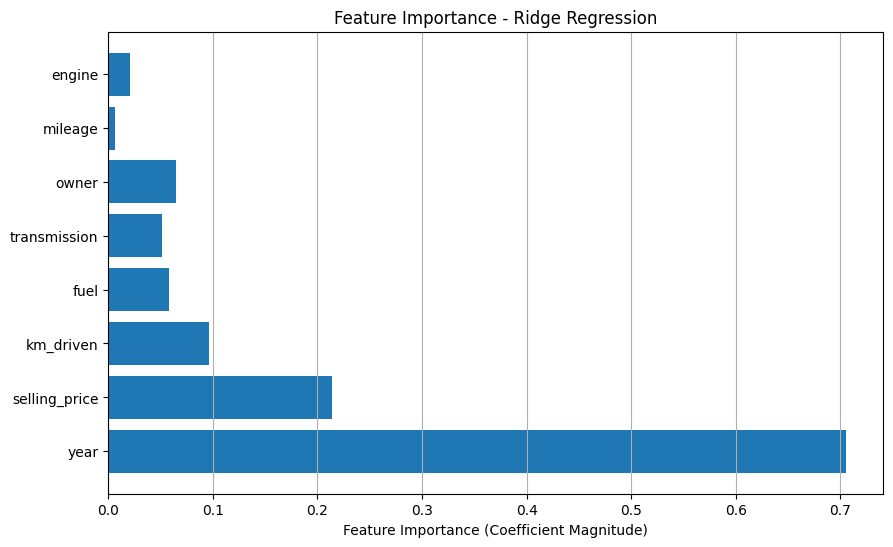

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Extract the Linear Regression model from the pipeline
regressor = best_model.named_steps['linearregression']

# ✅ Correct this line to access the coefficients from regressor, not best_model
feature_importance = np.abs(regressor.coef_[1:])  # Skip the first coefficient (intercept)

# ✅ Use the correct feature names
feature_names = df.columns[:-1]  # Ensure this matches the features used for training

# ✅ Ensure matching lengths to prevent plotting errors
min_length = min(len(feature_importance), len(feature_names))
feature_importance = feature_importance[:min_length]
feature_names = feature_names[:min_length]

# ✅ Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.title("Feature Importance - Ridge Regression")
plt.grid(axis='x')

# ✅ Display the plot
plt.show()

## Inference

In [69]:
import joblib
joblib.dump(best_model, "selling_price2.model")
print("Model saved successfully as selling_price2.model")

Model saved successfully as selling_price2.model


In [70]:
import pandas as pd
import numpy as np
import joblib

model = joblib.load("selling_price2.model")

sample = pd.DataFrame({
    "year": [2020],
    "mileage": [18.5],
    "km_driven": [25000],
    "owner": [1]
})

raw_pred = model.predict(sample)
print("Raw prediction (log price):", raw_pred)
print("Predicted price:", np.exp(raw_pred)[0])

Raw prediction (log price): [14.18497906]
Predicted price: 1446965.354371463


In [76]:
sample = X.iloc[[0]]  # Use first row from your training features
raw_pred = model.predict(sample)
print(df[["year", "mileage", "km_driven", "owner", "selling_price"]].iloc[0])
print("Raw prediction (log price):", raw_pred)
print("Predicted price:", np.exp(raw_pred)[0])

year               2014.0
mileage              23.4
km_driven        145500.0
owner                 1.0
selling_price    450000.0
Name: 0, dtype: float64
Raw prediction (log price): [12.90922033]
Predicted price: 404020.2713075813


In [58]:
df[['year', 'mileage', 'km_driven', 'owner', 'selling_price']].loc[1]

year               2014.00
mileage              21.14
km_driven        120000.00
owner                 2.00
selling_price    370000.00
Name: 1, dtype: float64